# Preprocess data

In [2]:
from packages import *

In [3]:
import hide_traceback

ZeroDivisionError: division by zero

In [3]:
# %matplotlib inline
%load_ext jupyter_spaces

In [4]:
plt.style.use('dark_background')
# plt.syle.use('default')

In [5]:
# %store -r df
df = pd.read_csv('./data_notebooks/clean_data.csv')
df.set_index('id', inplace= True)

In [25]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df['day'] = df['date'].apply(lambda x: x.day)
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)
df['Yearmonth'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))
#f['week day'] = df.date.dt.day_name()# return the name of week day
df['week day'] = df.date.dt.dayofweek
df['week'] = df.date.apply(lambda x: (x.day-1)//7+1)

In [7]:
data_2014 = df[df['year'] == 2014]
data_2015 = df[df['year'] == 2015]

In [8]:
%store df

Stored 'df' (DataFrame)


# First Question

Q:

Which houses should the CEO of House Rocket buy and at what price?

M:

    1. Variable: Price, Time
    
    2. Most important variables

A: 

## Price + Time + quantity

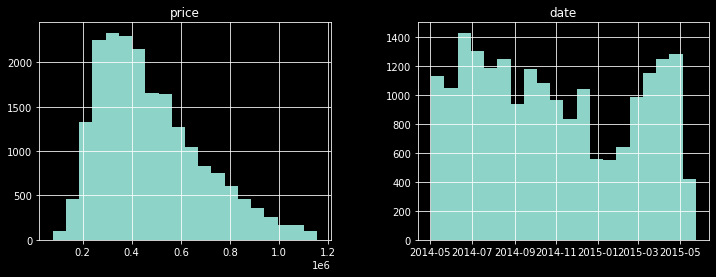

In [35]:
df[['price', 'date']].hist(bins=20, figsize=(12,4));

<AxesSubplot:xlabel='date', ylabel='price'>

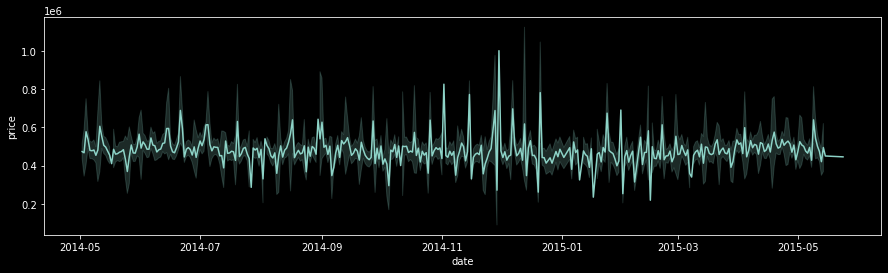

In [10]:
plt.subplots(figsize=(15,4))
sns.lineplot(data=df, x='date', y='price')

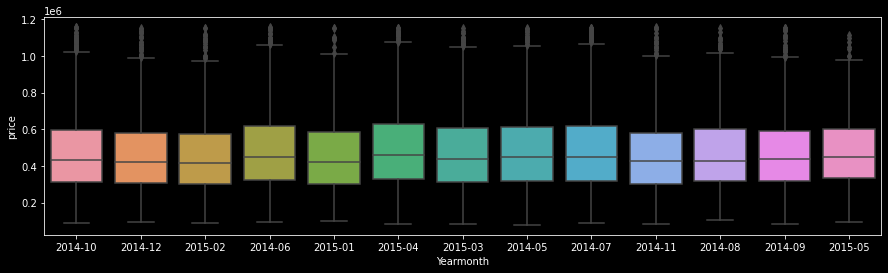

In [54]:
plt.subplots(figsize=(15,4))
sns.boxplot(data=df, x='Yearmonth', y='price');

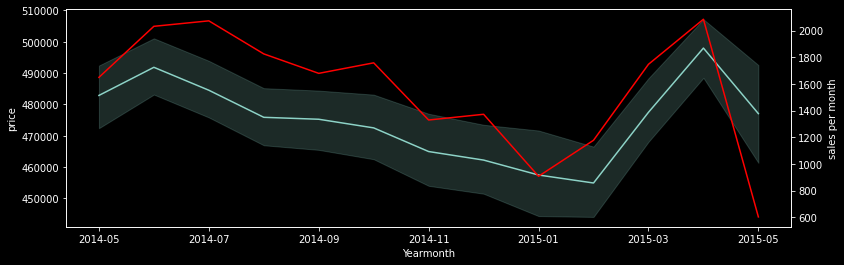

In [62]:
%%space price
f, ax1 = plt.subplots(figsize=(13,4));
g = sns.lineplot(data=df.sort_values('Yearmonth'), x='Yearmonth', y='price',ax=ax1);

ax2 = ax1.twinx();
data = df.value_counts('Yearmonth').sort_index();
h = sns.lineplot(x=data.index, y=data.values, ax=ax2, color='r').set(ylabel='sales per month', xticks=np.sort(data.index[::2]));
# h.set(ylabel='sales per month', xticks=np.sort(data.index[::2]))

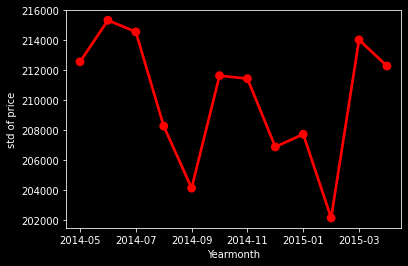

In [159]:
%%space price
data = df.groupby(['Yearmonth']).std()
h = sns.pointplot(x=data.index[:-1], y=data.price[:-1],color='r').set(ylabel='std of price', xticks=range(0,len(data.index[:-1]),2));

In [67]:
%%space price
data = pd.DataFrame(df.groupby(['Yearmonth']).sum()['price'])
data.loc['2015-02','price']

535448484.0

In [100]:
%%space price
mean_price = df.groupby('Yearmonth').mean()['price']
mean_price.sort_values(ascending=False)

Yearmonth
2015-04    497979.728058
2014-06    491846.429626
2014-07    484529.318862
2014-05    482869.945421
2015-03    477489.866056
2015-05    477065.182724
2014-08    475887.017534
2014-09    475267.351400
2014-10    472513.369170
2014-11    464964.698269
2014-12    462240.813411
2015-01    457478.721058
2015-02    454926.494477
Name: price, dtype: float64

In [79]:
%%space price
price_diff.index

Index(['2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
       '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
       '2015-05'],
      dtype='object', name='Yearmonth')

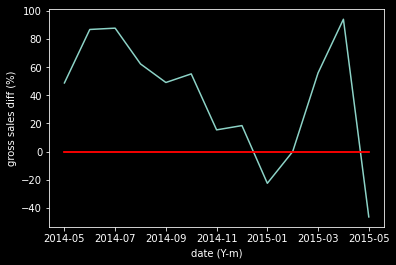

In [151]:
%%space price
target_cumulative_price = pd.DataFrame(df.groupby(['Yearmonth']).sum()['price']).loc['2015-02', 'price']
gross_sales_diff = (pd.DataFrame(df.groupby(['Yearmonth']).sum()['price']) - target_cumulative_price)/target_cumulative_price*100
g = sns.lineplot(data=gross_sales_diff, x=data.index, y= 'price')\
    .set(ylabel='gross sales diff (%)', xlabel= 'date (Y-m)', xticks=data.index[::2]);
plt.plot(gross_sales_diff.index,[0 for _ in gross_sales_diff.index], color='r')
plt.plot(gross_sales_diff.index,[0 for _ in gross_sales_diff.index], color='r')

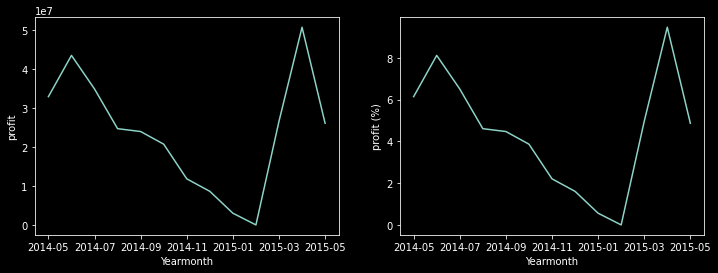

In [152]:
%%space price
f, axs = plt.subplots(1,2,figsize=(12,4))
size_sales = df['Yearmonth'].value_counts()
cost = size_sales['2015-02'] * mean_price['2015-02']
profit = size_sales['2015-02']* mean_price  - cost
g = sns.lineplot(x=profit.index,y=profit.values,ax=axs[0])\
    .set(ylabel='profit',xticks=profit.index[::2]);

profit_perc = (size_sales['2015-02']* mean_price  - cost)/cost*100
h = sns.lineplot(x=profit_perc.index,y=profit_perc.values,ax=axs[1])\
    .set(ylabel='profit (%)',xticks=profit_perc.index[::2]);
    
    %%space price
profit_perc = (size_sales['2015-02']* mean_price  - cost)/cost*100
g = sns.lineplot(x=profit_perc.index,y=profit_perc.values)\
    .set(ylabel='profit (%)',xticks=profit_perc.index[::2]);

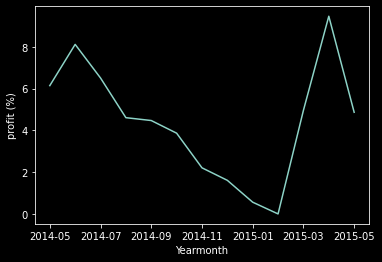

In [122]:
%%space price
profit_perc = (size_sales['2015-02']* mean_price  - cost)/cost*100
g = sns.lineplot(x=profit_perc.index,y=profit_perc.values)\
    .set(ylabel='profit (%)',xticks=profit_perc.index[::2]);

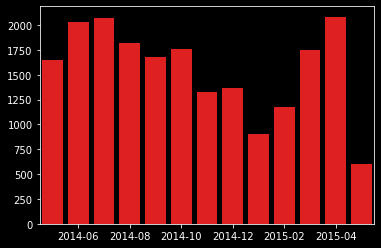

In [143]:
%%space price
size_sales = size_sales.sort_index()
g= sns.barplot(x=size_sales.index,y=size_sales.values, color='r')\
    .set(xticks=range(1,len(size_sales.index),2));

<AxesSubplot:>

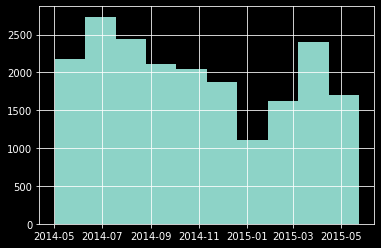

In [21]:
df.date.hist()

(<Figure size 360x288 with 1 Axes>, <AxesSubplot:>)

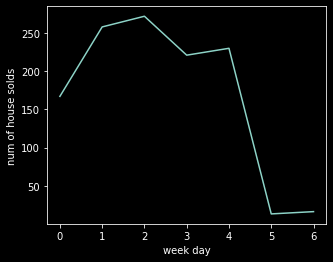

In [24]:
%%space price_fev
df02 = df[df['Yearmonth'] == '2015-02']
# data = df02['week day'].value_counts())/df.shape[0]*100
data = df02['week day'].value_counts()
plt.subplots(figsize=(5,4))
ax = sns.lineplot(x= data.index, y=data.values)\
       .set(ylabel='num of house solds', xlabel='week day');

<AxesSubplot:>

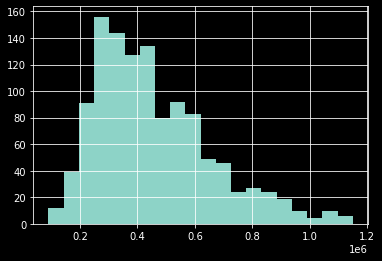

In [204]:
%%space price_fev
df02['price'].hist(bins=20)

<AxesSubplot:xlabel='week day', ylabel='week'>

<AxesSubplot:xlabel='week day', ylabel='week'>

<AxesSubplot:xlabel='week day', ylabel='week'>

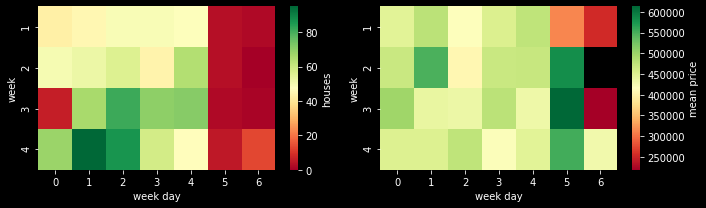

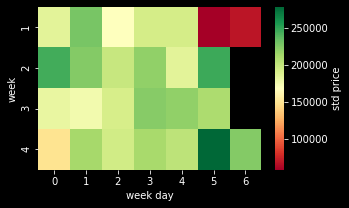

In [40]:
%%space price_fev
pivottab = pd.crosstab(df02['week'], df02['week day'])
pivottab2 = pd.pivot_table(df02, values='price', index='week', columns='week day', aggfunc='mean')
pivottab3 = pd.pivot_table(df02, values='price', index='week', columns='week day', aggfunc='std')
f1, axs = plt.subplots(1,2,figsize=(10,3))
sns.heatmap(pivottab, ax=axs[0], cmap='RdYlGn', cbar_kws={'label': 'houses'})
sns.heatmap(pivottab2, ax=axs[1], cmap='RdYlGn', cbar_kws={'label': 'mean price'})
f1.tight_layout()

f2, ax = plt.subplots(figsize=(5,3))
sns.heatmap(pivottab3, cmap='RdYlGn', cbar_kws={'label': 'std price'})

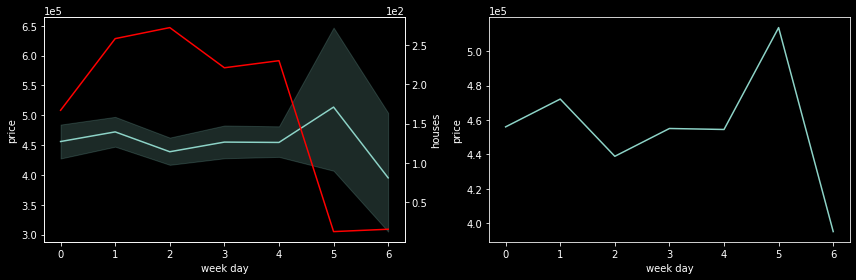

In [41]:
%%space price_fev
df02 = df[df['Yearmonth'] == '2015-02']
# data = df02['week day'].value_counts())/df.shape[0]*100
f, axs = plt.subplots(1,2, figsize=(12,4));
g = sns.lineplot(data=df02, x= 'week day', y='price',ax=axs[0])\
       .set(ylabel='price', xlabel='week day');
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax_a = axs[0].twinx()
data = df02['week day'].value_counts()
g = sns.lineplot(x= data.index, y=data.values,ax=ax_a, color='r')\
       .set(ylabel='houses', xlabel='week day');
ax_a.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


g = sns.lineplot(data=df02, x= 'week day', y='price', ci=None, ax=axs[1])\
       .set(ylabel='price', xlabel='week day');
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# axs[1].plot([2, 2],[400000,500000]);

f.tight_layout()

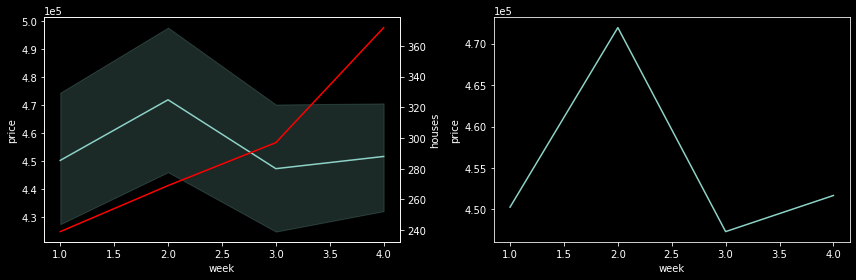

In [42]:
%%space price_fev
df02 = df[df['Yearmonth'] == '2015-02']
# data = df02['week day'].value_counts())/df.shape[0]*100
f, axs = plt.subplots(1,2, figsize=(12,4));
g = sns.lineplot(data=df02, x= 'week', y='price',ax=axs[0])\
       .set(ylabel='price', xlabel='week');
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax_a = axs[0].twinx()
data = df02['week'].value_counts()
g = sns.lineplot(x= data.index, y= data.values,ax=ax_a, color='r')\
       .set(ylabel='houses', xlabel='week');

g = sns.lineplot(data=df02, x= 'week', y='price', ci=None, ax=axs[1])\
       .set(ylabel='price', xlabel='week');
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

f.tight_layout()

(<Figure size 720x288 with 1 Axes>, <AxesSubplot:>)

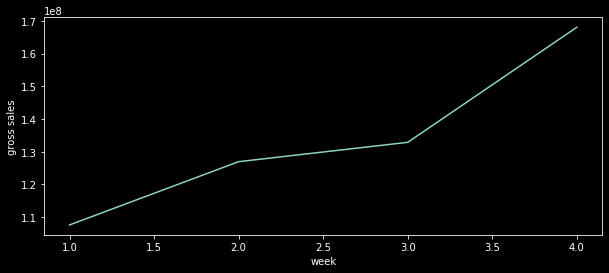

In [43]:
%%space price_fev
data = df02.groupby('week').sum()['price']
plt.subplots(figsize=(10,4))
ax = sns.lineplot(x= data.index, y=data.values)\
       .set(ylabel='gross sales',xlabel='week');

So the best week of month is the fourth week. Therefore, the best day to sell a home, assuming that the number of houses sold in a day is directly proportional to the probability to selling houses, is a Wednesday of fourth week of February of 2015.

## House Properties from February to May

In [23]:
df.columns()

TypeError: 'Index' object is not callable

In [30]:
%%space house0205
df2 = df[(df['year'] == 2015) & (df['month'].isin([2,3,4]))].copy()

<AxesSubplot:xlabel='month', ylabel='price'>

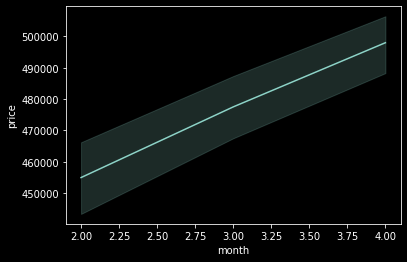

In [31]:
%%space house0205
sns.lineplot(data=df2, x='month', y='price')

In [65]:
%%space house0205
corr = df2.corr().sort_values('price', ascending=False, axis=0)
corr = corr.sort_values('price', ascending=False, axis=1)


In [93]:
%%space house0205
corr = corr[corr['price'] >= 0.25]
corr = corr.T[corr.T['price'] >= 0.25]

AttributeError: 'DataFrame' object has no attribute 'tight_layout'

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

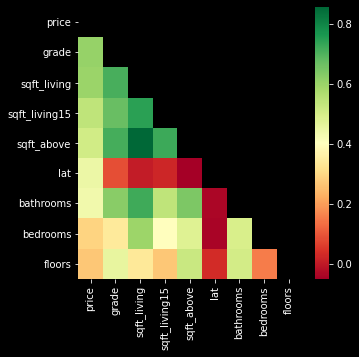

In [68]:
%%space house0205
mask = np.triu(np.ones_like(corr,dtype=bool))
plt.subplots(figsize=(5,5))
sns.heatmap(corr, mask=mask, cmap='RdYlGn')

In [97]:
%%space house0205
df02 = df[corr.columns][(df['Yearmonth'] == '2015-02')].copy()
df04 = df[corr.columns][(df['Yearmonth'] == '2015-04')].copy()

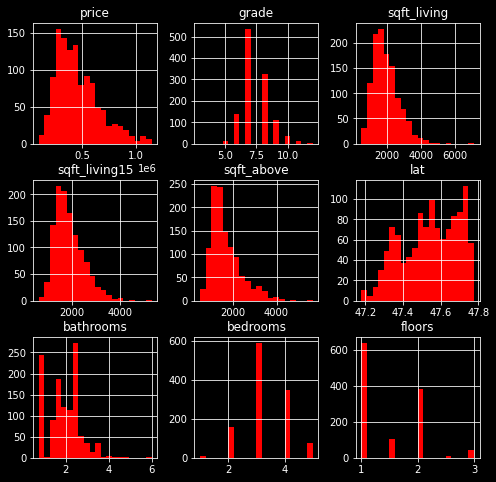

In [96]:
%%space house0205
hists = df02.hist(bins=20,figsize=(8,8), color='r')

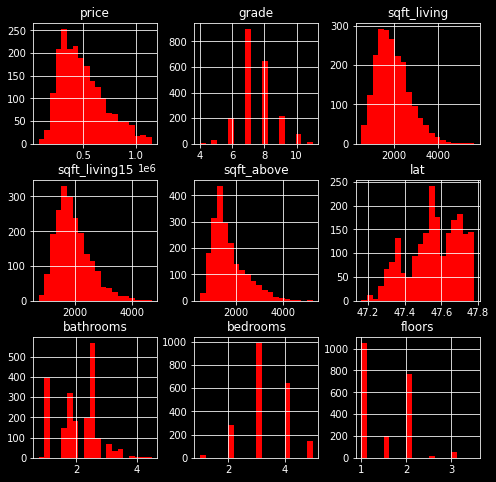

In [98]:
%%space house0205
hists = df04.hist(bins=20,figsize=(8,8), color='r')

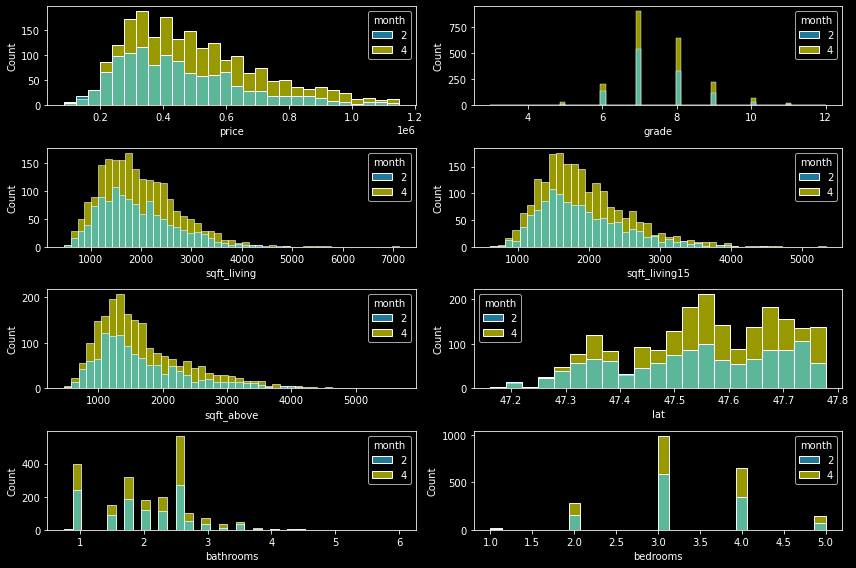

In [175]:
%%space house0205
# sns.histplot(df02['price'], color='b', alpha=0.5)
# sns.histplot(df04['price'], color='y', alpha=0.5)
def foo():
    a = df02
    b = df04
    a['month'] = 2
    b['month'] = 4
    c = pd.concat([a,b])
    fig, axs = plt.subplots(4,2,figsize=(12,8))
    sns.histplot(x="price", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'],ax=axs[0][0])
    sns.histplot(x="grade", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'],ax=axs[0][1])
    sns.histplot(x="sqft_living", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'],ax=axs[1][0])
    sns.histplot(x="sqft_living15", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'],ax=axs[1][1])
    sns.histplot(x="sqft_above", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'],ax=axs[2][0])
    sns.histplot(x="lat", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'],ax=axs[2][1])
    sns.histplot(x="bathrooms", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'],ax=axs[3][0])
    sns.histplot(x="bedrooms", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'],ax=axs[3][1])
    fig.tight_layout()
    

foo()

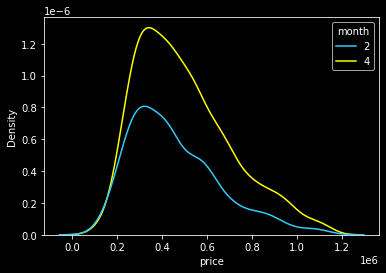

In [179]:
%%space house0205
def foo():
    a = df02
    b = df04
    a['month'] = 2
    b['month'] = 4
    c = pd.concat([a,b])
    sns.kdeplot(x="price", hue='month', data=c, alpha=0.6, palette=['#33ccff','#ffff00'])
    
foo()

In [215]:
%%space house0205
def foo(x):
    for idx in range(0,10,1):
        u_lim = 0.1e6 + 0.1e6*idx
        l_lim = 0 + 0.1e6*idx
        if l_lim <= x < u_lim:
            return f'{l_lim}-{u_lim}'
    else:
        return f'>{u_lim}'

a = pd.DataFrame(df02['price'].value_counts())
a.rename(columns={'price':'value count'},inplace=True)
a['price'] = a.index
a.reset_index(drop=True, inplace=True)
a['price group'] = a['price'].apply(foo)
a

,value count,price,price group
0,16,325000.0,300000.0-400000.0
1,13,425000.0,400000.0-500000.0
2,12,450000.0,400000.0-500000.0
3,11,340000.0,300000.0-400000.0
4,10,565000.0,500000.0-600000.0
...,...,...,...
626,1,313200.0,300000.0-400000.0
627,1,718000.0,700000.0-800000.0
628,1,186000.0,100000.0-200000.0
629,1,829000.0,800000.0-900000.0


In [216]:
%%space house0205
# sns.lineplot(x=a.price,y=a['price']*a['value count'])
b = a.groupby('price group').agg(['sum','mean'])
b

value count                 price              
                           sum      mean         sum          mean
price group                                                       
0.0-100000.0                 1  1.000000     89950.0  8.995000e+04
100000.0-200000.0           57  1.461538   6398893.0  1.640742e+05
200000.0-300000.0          233  2.118182  28043820.0  2.549438e+05
300000.0-400000.0          259  2.007752  45290266.0  3.510873e+05
400000.0-500000.0          214  2.140000  44460238.0  4.446024e+05
500000.0-600000.0          160  1.839080  48078082.0  5.526216e+05
600000.0-700000.0          102  1.789474  36554971.0  6.413153e+05
700000.0-800000.0           60  1.621622  27604515.0  7.460680e+05
800000.0-900000.0           49  1.256410  33071900.0  8.479974e+05
900000.0-1000000.0          25  1.250000  18943869.0  9.471934e+05
>1000000.0                  17  1.416667  13072280.0  1.089357e+06

In [1]:
%%space house0205
sns.lineplot(x=b.index,y=b['value count']['sum']*b['price']['mean'])

UsageError: Cell magic `%%space` not found.


<AxesSubplot:xlabel='grade', ylabel='price'>

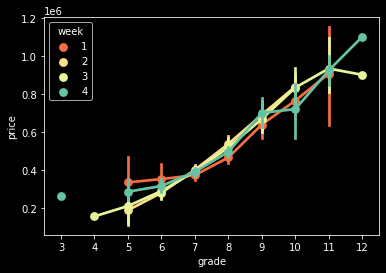

In [85]:
%%space house0205
sns.pointplot(data=df02,x='grade',y='price', hue='week', palette='Spectral')